## Hodgkin-Huxley model

### intro or smth like that

## Notes for the moment

### Notes on description of model
Models formlates current such that:
* $\displaystyle \sum_{k}^{}$Ik = gNa m^3 h (u - ENa) + gK n^4 (u - EK) + gL (u - EL).

If all channels open, transmit current with max conductance gNa and gK respectively (other channel has constant conductance given as 1/R)

<li>ENa, EK and EL, AND the conducatances are empirical parameters, and are the reversal potentials:
<li><b>Reversal potential:</b> reversal potential of an ion is membrane potential at which no net low of that particular ion fom one side of membrane to the other</li>
<i>Original value of these parameters reported by Hodgkin and Huxley are given on website http://icwww.epfl.ch/~gerstner/SPNM/node14.html.</i><br>
NOTE: need to shift voltage values by -65mV because those were given with a resting potential assumed to be 0, but not the case
</li>

#### m, n and h:
are called the "gating variables" and evolve according to differential eqs (given on websit). Those equations include alpha and beta factors that both are expressions of the membrane volatage mu. 

### Notes on dynamics of model
<li>m and n increase with mu, while h decrease (graph of this to support it)</li>
<li> --> if some external input cause membrane voltage mu to rise, conductance of Na channels increase --> positive Na ions flow into cell and raise even further membrane potential mu. If large enough --> action potential initiated.</li>
<li><b>Threshold type behavior:</b>action potential (which is a traveling spike in membrane potential) is initiated by a peak in current. If that peak in current is not high enough, don't get high large-soike excursion, but just small var. </li>
<li><b>Pulling the membrane voltage back down:</b>the K+ channel is outward so when open, it lowers potential. --> Overall effect is large spike in potential, and then h factor and K+ channel pull it back down (with a temp overshoot since temporarly get potential below rest potential.</li>
<li><b>With constant input current:</b> if I larger than some critical value known (I_theta) observe regular spiking in membrane potential. </li>
<li><b>Step current input:</b> whether triggers action potential or not depends on both the constant current value and the spike value too.</li> 
<li><b>Interesting element, refratoriness:</b> during hyperpolarization period followed action potential due to input current, neuron incapable of reacting to same input current</li>


### What type of current input is associated with vision stimulus from retina? 

#### Additional Notes:
Also need to figure out: <ul>
    <li>Do I have to take into account the what happens with synapses too?</li>
    <li>How much time needed to send response signal once signal reached brain?</li>
    <li>How long is the path from retina to brain and from brain to right arm?</li>
    <li><b>Example situation that will be chosen for project:</b> to make things more dramatic, will assume you are in a boxing match, and see your opponent's arm starting to move towards your face. Assume arm moving at 5 m/s (maybe change that val later), assuming separation between you two is 1.5m, at what distance from your face will arm be when start reacting?</li>
    <li>Ask papa for length of neuronal path, time for brain to analyze signal, what happens in synapses, etc</li>
    </ul>
    
### Setup so far: 
<ul>
    <li>Decided would start by modeling one neuron with length <i>1 cm</i></li>
    <li>Seems like each cicuit represents a part of the axon <b><i>parallel</i></b> to the direction the signal is being transmitted --> pick axon length, number of segments to cut it in, and associate a distinct ciruit with each of those (need to store the different parameters associated with each of them --> make a class that contains all variables need for circuit and make array of instances of that object). </li> 
    <li>What wanna "plot"/see evolve is the membrane voltage. Relation with current given on website --> calculate current to get mu. 

In [42]:
import numpy as np                         ## numpy is a library that inclues most of the numerical funciton you will need
import matplotlib.pyplot as plt            ## this is the library we use to plot
from math import exp

In [58]:
class HHcircuit: 
    def __init__(self, gNa, gK, gL, C, mu, E_Na, E_K, E_L):
        self.gNa = gNa
        self.gK = gK
        self.gL = gL
        self.m = 0.0
        self.n = 0.0
        self.h = 0.0
        self.C = C
        self.mu = mu
        
        self.E_Na = E_Na
        self.E_K = E_K
        self.E_L = E_L
        
    def update_m(self, dt):
        alpha_m = (2.5-0.1*self.mu)/(exp(2.5-0.1*self.mu) - 1)
        beta_m = 4*exp(-self.mu / 18)
        
        dm = dt * (alpha_m*(1-self.m) - beta_m*self.m)
        self.m += dm
        return self.m
    
    def update_n(self, dt):
        alpha_n = (0.1-0.01*self.mu)/(exp(1-0.1*self.mu) - 1)
        beta_n = 0.125*exp(-self.mu / 80)
        
        dn = dt * (alpha_n*(1-self.n) - beta_n*self.n)
        self.n += dn
        return self.n
    
    def update_h(self, dt):
        alpha_h = 0.07*exp(-self.mu / 20)
        beta_h = 1 / (exp(3-0.1*self.mu)+1)
        
        dh = dt * (alpha_h*(1-self.h) - beta_h*self.h)
        self.h += dh
        return self.h
    
    def sum_I_channels(self): 
        s = 0
        s += self.gNa* (self.m)**3 *self.h*(self.mu-self.E_Na)
        s += self.gK* (self.n)**4 *(self.mu-self.E_K)
        s += self.gL*(self.mu - self.E_L)
        return s

In [59]:
# x = HHcircuit(0,0,0,0,0,0,0, 0)
# x.update_m(1)

In [122]:
# Numerical values, obtained from experiments
# E_Na = 50.0 #mV
# E_K = -77.0
# E_L = -54.4
# gNa = 120.0 # mS/cm^2
# gK = 36.0
# gL = 0.3
# mu0 = -65.0 # value given by shift from paper

# non shifted values
E_Na = 115.0 #mV
E_K = -12.0
E_L = 10.6
gNa = 120.0 # mS/cm^2
gK = 36.0
gL = 0.3
mu0 = 0.0 # assumes rest potential of membrane is 0mV

C = 1.0 # to verify

# creating necessary objects
neuron = HHcircuit(gNa, gK, gL, C, mu0, E_Na, E_K, E_L)
recorded_mu = []
times = []

# parameters of experimental run
T = 25.0# ms 
t_steps = 10000
dt = T / t_steps
t = 0.0
I_peak = 100.0

first_pass = False # enables to have a current peak of duration dt only

#temp 
I_out = []


for i in range(t_steps):
    neuron.update_n(dt)
    neuron.update_m(dt)
    neuron.update_h(dt)
    
    sum_currents = I_peak - neuron.sum_I_channels()
    d_mu = sum_currents / neuron.C * dt
    neuron.mu += d_mu
    
    # save values
    recorded_mu.append(neuron.mu)
    times.append(t)
    t += dt
    
    I_out.append(C*d_mu/dt + sum_currents)
    
    if not first_pass:
        I_peak = 0.0
        first_pass = True


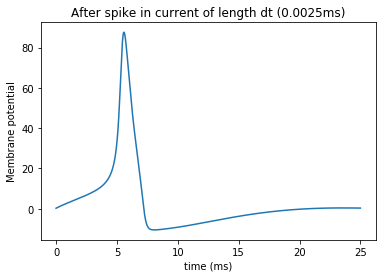

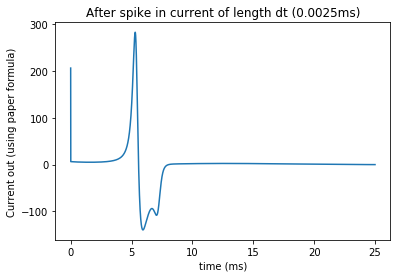

In [129]:
plt.plot(times, recorded_mu)
plt.xlabel("time (ms)")
plt.ylabel("Membrane potential")
plt.title("After spike in current of length dt ("+str(dt)+"ms)")
plt.show()

plt.plot(times, I_out)
plt.xlabel("time (ms)")
plt.ylabel("Current out (using paper formula)")
plt.title("After spike in current of length dt ("+str(dt)+"ms)")
plt.show()

https://www.sciencedirect.com/science/article/pii/B9780080450469014133 read this to understand and figure out eq to get action potential speed

Question now is how do I used this to make several of these circuits in series? 
Should just be circuit in series so basically all I need is figure out output current of each of these circuits

<b> need to figure out how to find velocity of action potentials</b>
<ul>
    <li>First: try to find stuff online</li>
    <li>Maybe can use formula with current density that gives speed of charge carriers (but feel like thatd be the speed of ions flowing in and out of the membrane</li>
    <li>OR, can just find period of peak and use length of "part of axion", but dont really see how that links to a continuous case</li>